In [15]:
# Övning 1a) Read in the file "student-mat-missing-data.csv" found in the course github repo into a Pandas DataFrame
import pandas as pd

file = '../../Data/Databehandling/student-mat-missing-data.csv'
df = pd.read_csv(file)

df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,20.0,U,LE3,A,2,2,services,...,5.0,5.0,4.0,4,5,4.0,11.0,9,9,9
391,391,MS,M,17.0,U,LE3,T,3,1,services,...,2.0,4.0,5.0,3,4,2.0,3.0,14,16,16
392,392,MS,M,21.0,R,GT3,T,1,1,other,...,5.0,5.0,3.0,3,3,3.0,3.0,10,8,7
393,393,MS,M,18.0,R,LE3,T,3,2,services,...,4.0,4.0,1.0,3,4,5.0,0.0,11,12,10


In [16]:
# 1b) Do some initial explorations with the methods to get an understanding of the dataset:
# head(), info(), describe(), value_counts(), unique(), columns()

print(df.head())
print(df.info())
print(df.describe())
print(df.value_counts())
print(df.nunique())
print(df.columns)

   Unnamed: 0 school sex   age address famsize Pstatus  Medu  Fedu     Mjob  \
0           0     GP   F  18.0       U     GT3       A     4     4  at_home   
1           1     GP   F  17.0       U     GT3       T     1     1  at_home   
2           2     GP   F  15.0       U     LE3       T     1     1  at_home   
3           3     GP   F  15.0       U     GT3       T     4     2   health   
4           4     GP   F  16.0       U     GT3       T     3     3    other   

   ... famrel freetime goout  Dalc  Walc  health absences  G1  G2  G3  
0  ...    4.0      3.0   4.0     1     1     3.0      6.0   5   6   6  
1  ...    5.0      3.0   3.0     1     1     3.0      4.0   5   5   6  
2  ...    4.0      3.0   2.0     2     3     3.0     10.0   7   8  10  
3  ...    3.0      2.0   2.0     1     1     5.0      2.0  15  14  15  
4  ...    4.0      3.0   2.0     1     2     5.0      4.0   6  10  10  

[5 rows x 34 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 39

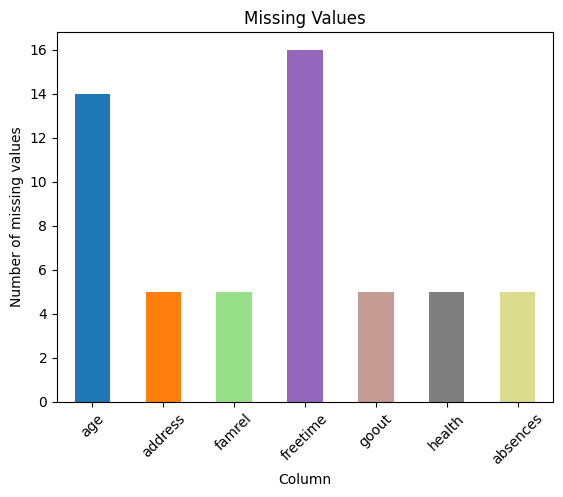

In [17]:
# 1c) data_utils.py
# 1d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

from data_utils import plot_missing_values

plot_missing_values(df)


In [18]:
# 1e) Find all rows where the freetime is NaN.

freetime_rows_Nan = df[df["freetime"].isna()].index.to_list()

print(f"These are the rows when the freetime is Nan: {freetime_rows_Nan}")

These are the rows when the freetime is Nan: [87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]


In [19]:
# 1f) Find all rows where the freetime or the age is NaN.
freetime_age_rows_Nan = df[df["freetime"].isna() | df["age"].isna()].index.to_list()

print(f"These are the rows when the freetime and age are Nan: {freetime_age_rows_Nan}")


These are the rows when the freetime and age are Nan: [20, 71, 87, 99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]


In [20]:
# 1g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

several_Nan_rows = df[df.isna().sum(axis=1) >= 2]

proportion = len(several_Nan_rows) / len(df)

print(f"Proportion of rows in several NaNs: {proportion:.3}")

Proportion of rows in several NaNs: 0.0127


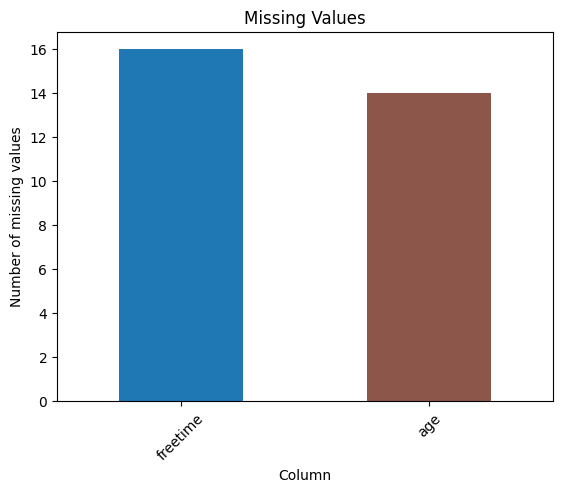

In [21]:
# 2a) As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is 
# small enough to be safe to just remove.
# Now remove these rows and use your missing-value utility function visualize the remaining NaNs.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = df.loc[:, ["freetime", "age"]]

plot_missing_values(df_cleaned)

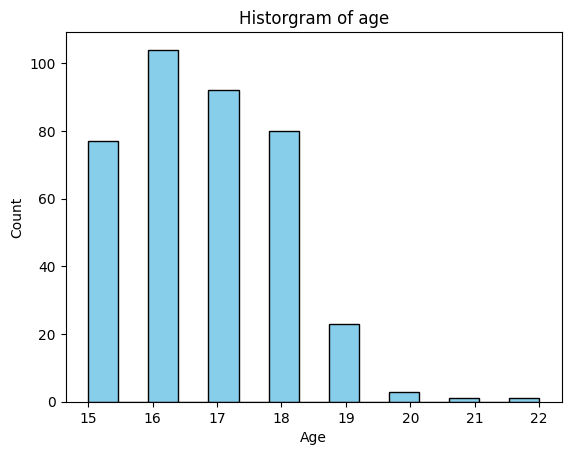

In [22]:
# 2b) The domain expert has told you that you have to fill in the missing age values. 
# Start with visualising the age distribution in the dataset using a histogram.

plt.hist(df["age"].dropna(), bins=15, color="skyblue", edgecolor="black")
plt.title("Historgram of age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [23]:
# 2c) Check which columns there are in the dataset to see what can be utilised in determining the age.

print(df.columns)

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [24]:
# 2d) The column higher seems interesting. Let's see which unique values it can have.

print(df["higher"].unique())

['yes' 'no']


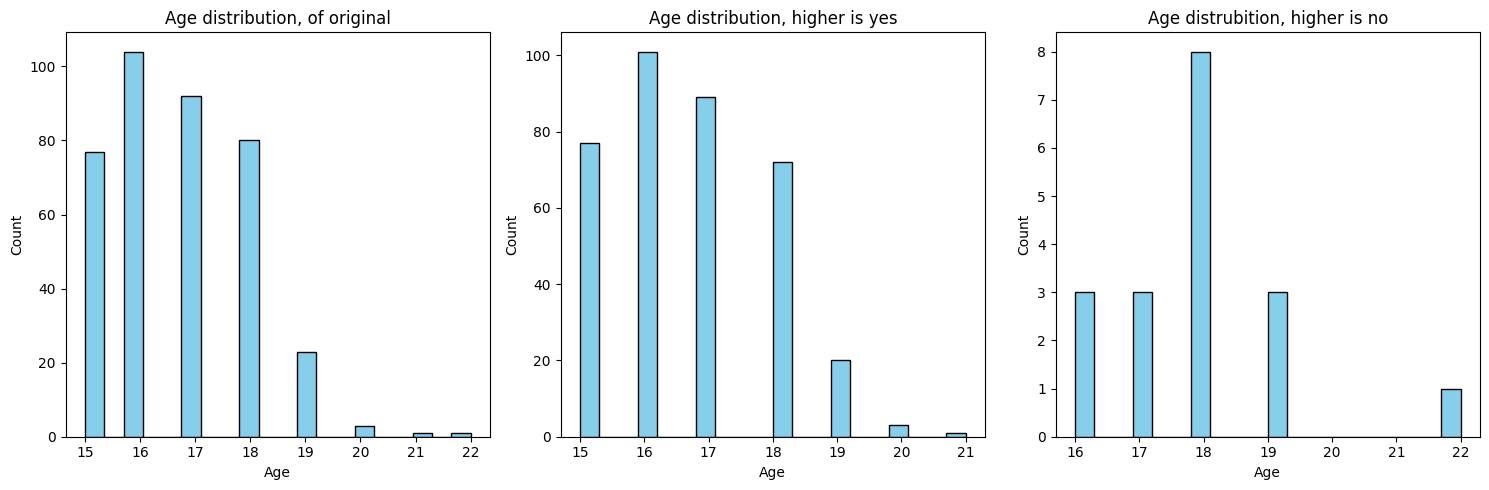

In [25]:
# 2e) Let's see if we can see some connection between age distribution and higher. Make 3 subplots of age histograms:
# Plot 1: same as b)
# Plot 2: age distribution when higher is yes
# Plot 3: age distribution when higher is no

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(df["age"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Age distribution, of original")
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(df[df["higher"] == "yes"]["age"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Age distribution, higher is yes")
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.hist(df[df["higher"] == "no"]["age"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Age distrubition, higher is no")
plt.xlabel("Age")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [26]:
# 2f) That was hard to find a connection. When reading dataset source we find alcohol consumption, maybe there is some connection between age and alcohol consumption.
# Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns

df["Alcohol"] = df["Dalc"] + df["Walc"]

print(df["Alcohol"])


0      2
1      2
2      5
3      2
4      3
      ..
390    9
391    7
392    6
393    7
394    6
Name: Alcohol, Length: 395, dtype: int64


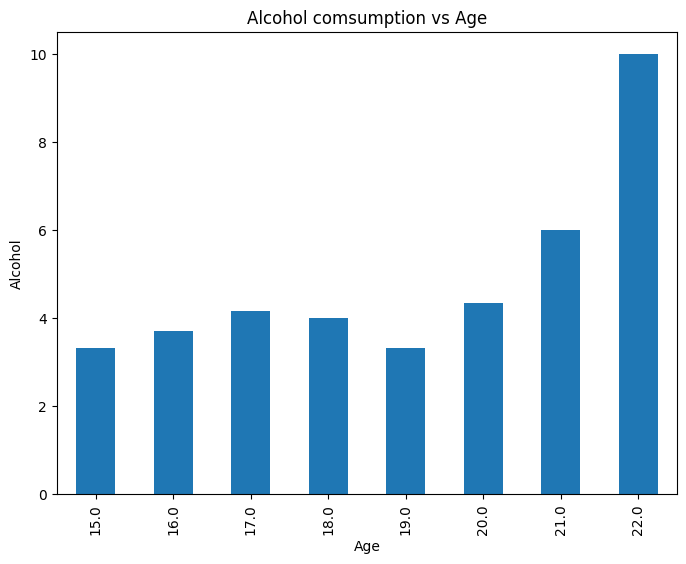

In [ ]:
# g) Make a barchart for alcohol consumption vs age.

age_alcohol = df.groupby("age")["Alcohol"].mean()

plt.figure(figsize=(8,6))
age_alcohol.plot(kind="bar")
plt.title("Alcohol comsumption vs Age")
plt.xlabel("Age")
plt.ylabel("Alcohol")
plt.show()